# Homework 4 - Graph Neural Networks

In this homework we will implement graph representation, graph classification, neighborhood sampling and graph attention components. This homework is based on the Chapter 13 from the book [https://udlbook.github.io/udlbook/](https://udlbook.github.io/udlbook/) 

## Part 1 - Graph Representation (10 points)

This notebook investigates representing graphs with matrices as illustrated in figure 13.4 from the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

random.seed(137)

Below we present two approaches to creating a Graph() object using the networkx package. In the first approach we use the adjaceny matrix to create the graph.

In [2]:
# Routine to draw graph structure
def draw_graph_structure(adjacency_matrix):
  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True)
  print(G.nodes())
  plt.show()

[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]
[1, 0, 2, 3, 4, 5, 6, 7]


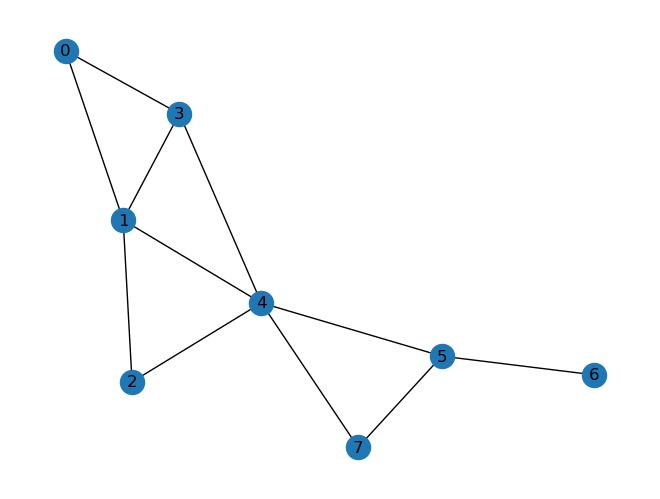

In [3]:
# Define an adjacency matrix 
A_first = np.array(
    [[0,1,0,1,0,0,0,0],
     [1,0,1,1,1,0,0,0],
     [0,1,0,0,1,0,0,0],
     [1,1,0,0,1,0,0,0],
     [0,1,1,1,0,1,0,1],
     [0,0,0,0,1,0,1,1],
     [0,0,0,0,0,1,0,0],
     [0,0,0,0,1,1,0,0]]);
print(A_first)
draw_graph_structure(A_first)
# Note that the nodes are labelled from 0 rather than 1 as in the book

In the second approach we add nodes and edges explicitly.

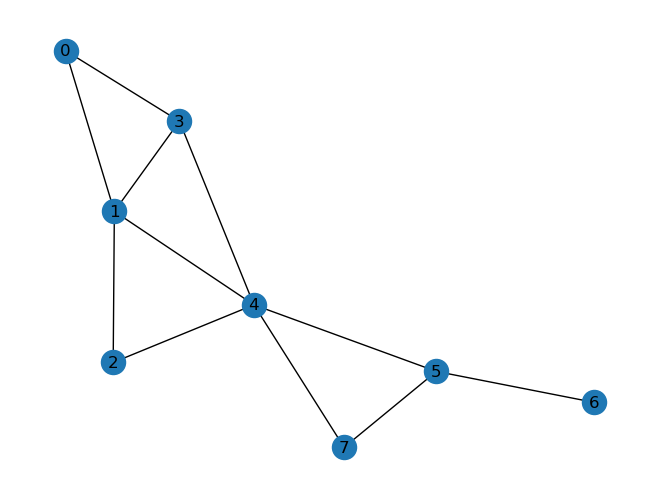

['0', '1', '2', '3', '4', '5', '6', '7']
[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]


In [4]:
#Add nodes and edges explicitly
G = nx.Graph()
G.add_nodes_from(['0', '1', '2', '3', '4', '5', '6', '7'])
G.add_edge('0','1')
G.add_edge('1','2')
G.add_edge('0','3')
G.add_edge('1','3')
G.add_edge('1','4')
G.add_edge('2','4')
G.add_edge('3','4')
G.add_edge('4','5')
G.add_edge('5','6')
G.add_edge('4','7')
G.add_edge('5','7')
nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True)
plt.show()

print(G.nodes())
A_second = nx.adjacency_matrix(G, G.nodes()).toarray()
print(A_second)


In [5]:
# 5 points
# TODO -- find algorithmically how many walks of length 4 are between nodes 5 and 6

# this just finds the number of walks from a node of inerest with defaults of lengths 4 between nodes 5 and 6
def path_length_of_A(A, node_of_interest = [5,6], length = 4):

    A_power = np.linalg.matrix_power(A, length)
    return A_power[node_of_interest[0], node_of_interest[1]]

num_walks = path_length_of_A(A_second, [5,6], 4)

print("Number of  walks of length 4 between nodes 5 and 6 = {num_walks}".format(num_walks=num_walks))

# 5 points
# TODO: Find algorithmically how many paths of length 4 are there between node 6 and every other node

# this just finds the number of paths from a node 6 with lengths 4 between every other node
x = np.zeros((A_second.shape[0],1))

for i in range(0, A_second.shape[0]):
    temp = path_length_of_A(A_second, [6,i], 4)
    x[i] = temp

print("Number of paths of length 4 from node 6 to every other node \n", x.reshape(1,-1))

Number of  walks of length 4 between nodes 5 and 6 = 2
Number of paths of length 4 from node 6 to every other node 
 [[2. 3. 2. 2. 7. 2. 3. 4.]]


## Part 2 - Graph Classification - 20 points

Let's build the components of a model that maps a chemical structure to a binary decision. This model might be used to predict whether a chemical is liquid at room temperature or not. We'll start by drawing the chemical structure for [Propanol](https://upload.wikimedia.org/wikipedia/commons/b/b8/Propanol_flat_structure.png). 

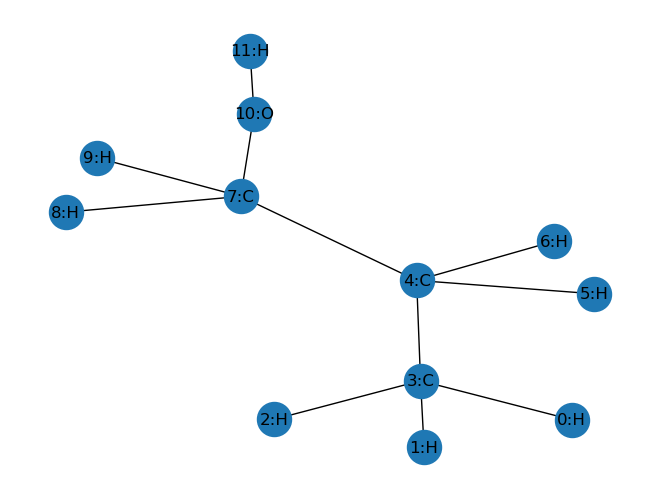

In [6]:
# Define a graph that represents the chemical structure of Propanol and draw it. 
# Each node can be labelled with the node number and the element, for example, '0:H', '3:C', '1:H', '10:O' etc. 
#TODO: Create the Propanaol graph and plot it
G = nx.Graph()


# fun fact, I have a degree in chemistry and I am a chemist by training
# I have done research in chemical labs and have synthesized 4 molecules where
# I was the first person to ever make them. 

# I started making this from memory and then went back to check the structure
# I confused it for cyclopropanol, which is a different molecule and made me feel
# like I wasted a balchelor's degree in chemistry

G.add_nodes_from(['0:H', '1:H', '2:H', '3:C', '4:C', '5:H', '6:H', '7:C', '8:H', '9:H', '10:O', '11:H'])
G.add_edge('0:H','3:C')
G.add_edge('1:H','3:C')
G.add_edge('2:H','3:C')
G.add_edge('3:C','4:C')
G.add_edge('4:C','5:H')
G.add_edge('4:C','6:H')
G.add_edge('4:C','7:C')
G.add_edge('7:C','8:H')
G.add_edge('7:C','9:H')
G.add_edge('7:C','10:O')
G.add_edge('10:O','11:H')

nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True, node_size=600)
plt.show()

In [7]:
# 5 points
# Adjacency matrix for Propanol
# TODO -- Display the adjacency matrix for this chemical

A_third = nx.adjacency_matrix(G, G.nodes()).toarray()

print("Adjacency matrix for Propanol")
print(A_third)

## NOTE: The Adjacency Matrix will change based on the order of the nodes. 
    
# TODO -- Define node matrix X
# There will be 12 nodes and 118 possible chemical elements
# so we'll define a 118x12 matrix.  Each column represents one
# node and is a one-hot vector (i.e. all zeros, except a single one at the
# chemical number of the element).
# Chemical numbers:  Hydrogen-->1, Carbon-->6,  Oxygen-->8
# Since the indices start at 0, we'll set element 0 to 1 for hydrogen, element 5
# to one for carbon, and element 7 to one for oxygen

X_chem = np.zeros((118,12))

node_elements = [1, 1, 1, 6, 6, 1, 1, 6, 1, 1, 8, 1]  

for node_idx, atomic_number in enumerate(node_elements):
    X_chem[atomic_number - 1, node_idx] = 1  


# Print the top 15 rows of the data matrix
print(X_chem[0:15,:])


Adjacency matrix for Propanol
[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0]]
[[1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Now let's define a network with four layers that maps this graph to a binary value, using the formulation in equation 13.11.

In [8]:
# We'll need these helper functions

# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define the logistic sigmoid function
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))



In [9]:
# Our network will have K=3 hidden layers, and will use a dimension of D=200.
K = 3; D = 200
# Set seed so we always get the same random numbers

# fun fact, I set the random number to this in the final and then spent way too long
# trying to debug the code
np.random.seed(137)
# Let's initialize the parameter matrices randomly with He initialization
Omega0 = np.random.normal(size=(D, 118)) * 2.0 / D
beta0 = np.random.normal(size=(D,1)) * 2.0 / D
Omega1 = np.random.normal(size=(D, D)) * 2.0 / D
beta1 = np.random.normal(size=(D,1)) * 2.0 / D
Omega2 = np.random.normal(size=(D, D)) * 2.0 / D
beta2 = np.random.normal(size=(D,1)) * 2.0 / D
omega3 = np.random.normal(size=(1, D))
beta3 = np.random.normal(size=(1,1))

In [10]:
def graph_neural_network(A_input, X_input, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3):
  # TODO Define this network according to equation 13.11 from the book
  # We will use ReLU as the nonlinear activation for the hidden layers
  # We will use sigmoid activation for the last layer

  H1 = ReLU(beta0 @ np.ones((A_input.shape[0],1)).T + Omega0 @ X_input @ (A_input + np.identity(A_input.shape[0])))
  H2 = ReLU(beta1 @ np.ones((A_input.shape[0],1)).T + Omega1 @ H1 @ (A_input + np.identity(A_input.shape[0])))
  H3 = ReLU(beta2 @ np.ones((A_input.shape[0],1)).T + Omega2 @ H2 @ (A_input + np.identity(A_input.shape[0])))
  f = sigmoid(beta3 + omega3 @ np.sum(H3, axis=1) / H3.shape[1]) 
  
  return f;

In [11]:
# 10 points
# Let's test this network
f = graph_neural_network(A_third,X_chem, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("Your value is %3f: "%(f[0,0]))

# getting a value of 86.7% is not great but it at leaast is accurate for propanol

Your value is 0.867185: 


In [12]:
# 5 points
# Let's check that permuting the indices of the graph doesn't change
# the output of the network
# Define a permutation matrix
P = np.eye(A_third.shape[0])
np.random.shuffle(P)
print(P)

# TODO -- Use the Permutation matrix P to permute the adjacency matrix A and node matrix X
# Replace these lines using Eq. 13.1
A_permuted = P.T @ np.copy(A_third) @ P
X_permuted = np.copy(X_chem) @ P

f2 = graph_neural_network(A_permuted, X_permuted, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("After permutation value is %3f: "%(f2[0,0]), "Before permutation value is %3f: "%(f[0,0]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
After permutation value is 0.867185:  Before permutation value is 0.867185: 


## Part 3 - Neighborhood Sampling - 40 points
In this section we will investigate neighborhood sampling of graphs as in figure 13.10 from the book.

Let's construct the graph from figure 13.10, which has 23 nodes.

In [13]:
# Define adjacency matrix
# DO NOT change this matrix
A = np.array([[0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,1, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 1,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,1, 0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 0,0,1,0,1, 1,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,1, 1,1,0,0,0, 1,0,0,1,0, 0,0,0,0,0, 0,0,0],
              [0,1,0,0,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,1,1,0,0, 0,1,0,1,0, 0,1,1,0,0, 0,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,1,1,0,0, 0,0,1,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,1, 1,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 1,0,0,1,0, 0,1,1,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,1,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,1, 0,1,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,1,1,0,0, 1,0,1,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0,1,0, 1,1,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0, 0,0,1,0,0, 0,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1, 1,1,0,0,0, 1,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,1, 0,1,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0, 1,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0]]);
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [14]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):

  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  color_map = []

  for node in G:
    if original_node[node]:
      color_map.append('brown')
    else:
      if neighborhood_nodes[node]:
        color_map.append('orange')
      else:
        color_map.append('white')

  nx.draw(G, nx.spring_layout(G, seed = 7), with_labels=True,node_color=color_map)
  plt.show()

Output layer:


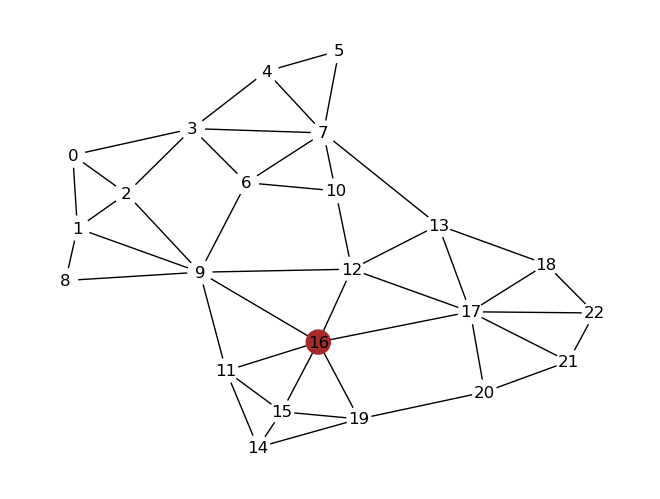

In [15]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes=np.zeros((n_nodes,1)); output_layer_nodes[16]=1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes,1))
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 16 in the output layer (highlighted). The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

Hidden layer 2:


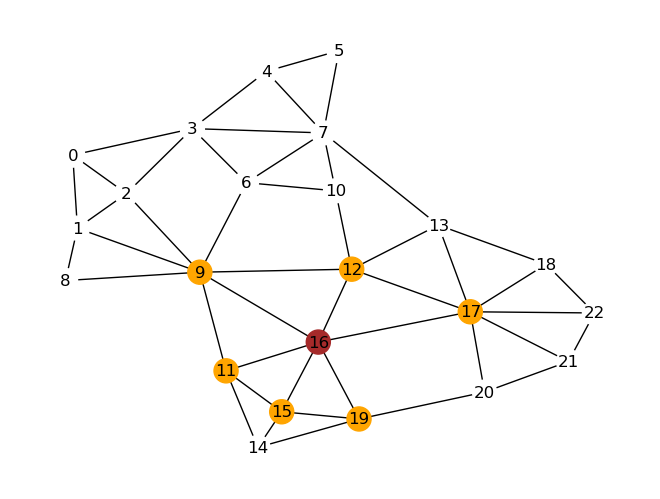

In [16]:
# 4 points
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix

A_temp_1 = np.copy(A)

A1_1 = A_temp_1[:, 16].reshape(-1, 1)

hidden_layer2_nodes = A1_1


print("Hidden layer 2:")
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

Hidden layer 1:


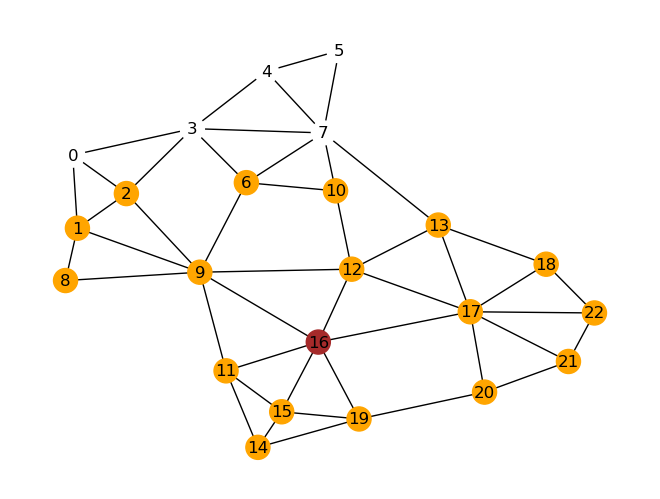

In [17]:
# 3 points
# TODO - Find the nodes in hidden layer 1 that connect that connect to node 16 in the output layer
# using the adjacency matrix

A2_1 = A_temp_1 @ A1_1  # result is (n, 1) boolean vector
hidden_layer1_nodes = (A1_1 + A2_1) 

print("Hidden layer 1:")
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:


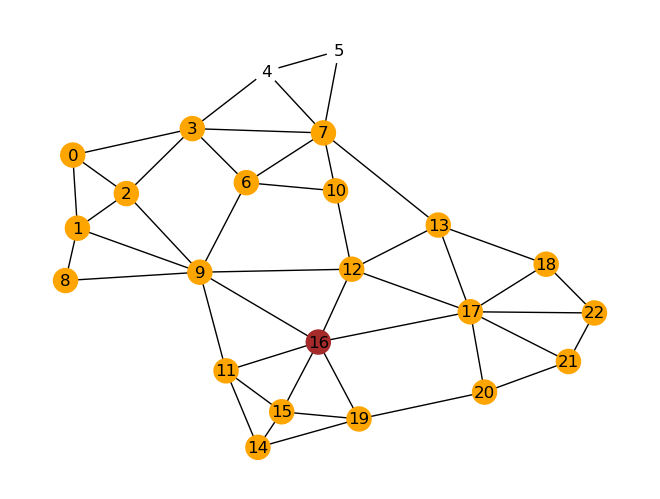

In [18]:
# 3 points
# TODO Find the nodes in the input layer that connect to node 16 in the output layer
# using the adjacency matrix

A3_1 = A_temp_1 @ A2_1

input_layer_nodes = A1_1 + A2_1 + A3_1

print("Input layer:")
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

This is bad news. This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers. Nonetheless, we have to involve almost all the nodes in the graph to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling. We'll start again with a single node in the output layer.

Output layer:


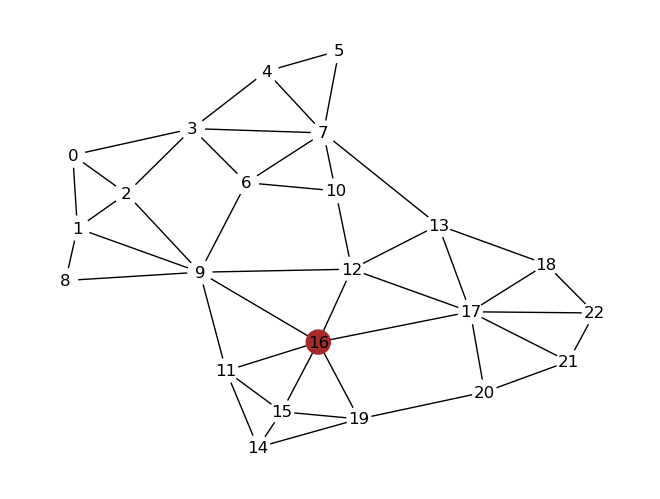

In [19]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [20]:
# Define number of neighbors to sample
n_sample = 3

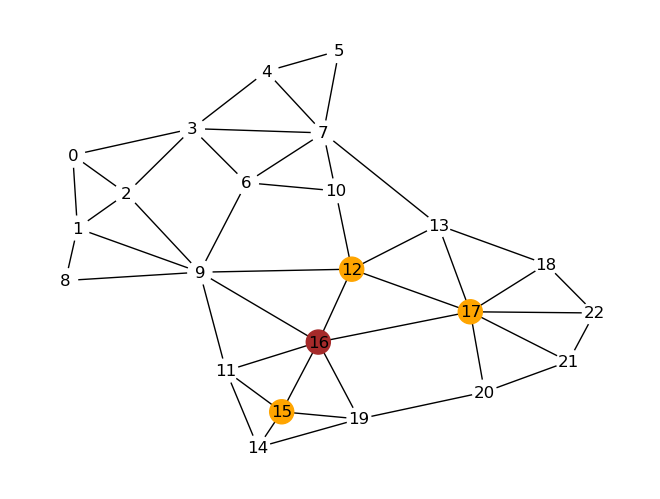

In [21]:
# 10 points
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.

A_temp_2 = np.copy(A)

A1_2 = A_temp_2[:, 16].reshape(-1, 1)
A1_sample = np.random.choice(np.where(A1_2 > 0)[0], n_sample, replace=False)
hidden_layer2_nodes = np.zeros(A_temp_2.shape[0])  
hidden_layer2_nodes[A1_sample] = 1  

draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

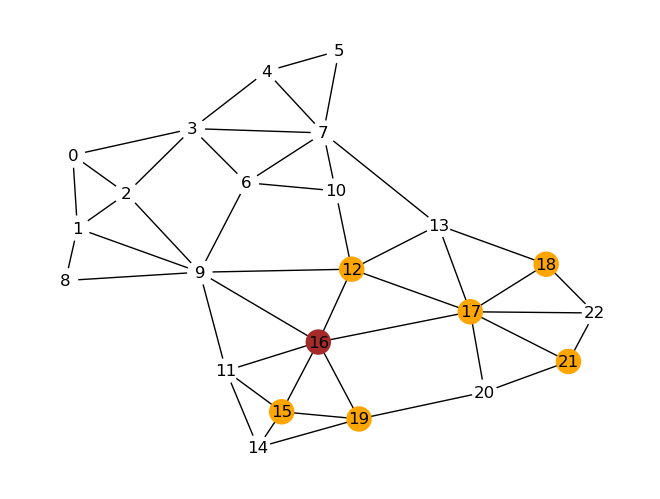

In [22]:
# 10 points
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2, or the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2

# Replace this line:

hidden_layer2_mask = hidden_layer2_nodes == 1

nodes_1_step_away = np.where(np.sum(A_temp_2[:, hidden_layer2_mask], axis=1) > 0)[0]
exclude_nodes = np.where(hidden_layer2_nodes == 1)[0]  
exclude_nodes = np.union1d(exclude_nodes, output_layer_nodes) 
exclude_nodes = np.union1d(exclude_nodes, [16])
nodes_to_sample = np.setdiff1d(nodes_1_step_away, exclude_nodes)

sampled_nodes = np.random.choice(nodes_to_sample, n_sample, replace=False)

hidden_layer1_nodes = np.zeros(A.shape[0])
hidden_layer1_nodes[hidden_layer2_mask] = 1  
hidden_layer1_nodes[sampled_nodes] = 1  

draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

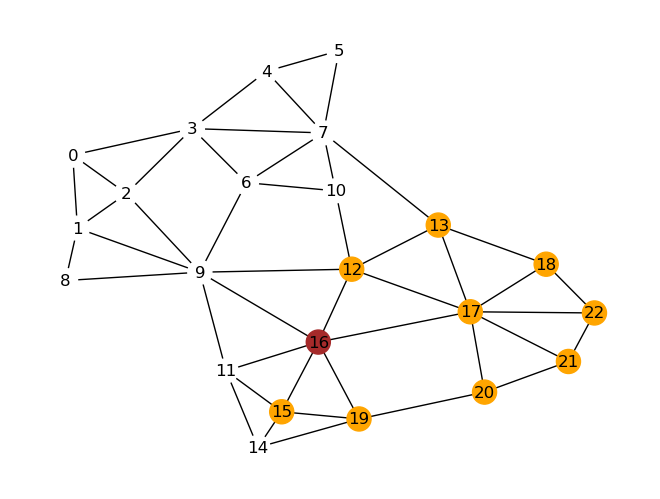

In [23]:
# 10 points
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2

# Replace this line:

hidden_layer1_mask = hidden_layer1_nodes == 1

nodes_1_step_away = np.where(np.sum(A_temp_2[:, hidden_layer1_mask], axis=1) > 0)[0]
exclude_nodes = np.where(hidden_layer1_nodes == 1)[0]
exclude_nodes = np.union1d(exclude_nodes, hidden_layer2_nodes)
exclude_nodes = np.union1d(exclude_nodes, output_layer_nodes)
exclude_nodes = np.union1d(exclude_nodes, [16])
nodes_to_sample = np.setdiff1d(nodes_1_step_away, exclude_nodes)

sampled_nodes = np.random.choice(nodes_to_sample, n_sample, replace=False)

input_layer_nodes = np.zeros(A.shape[0])
input_layer_nodes[hidden_layer1_mask] = 1
input_layer_nodes[sampled_nodes] = 1



draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

If you did this correctly, there should be 9 yellow nodes in the figure. The "receptive field" of node 16 in the output layer increases much more slowly as we move back through the layers of the network.

## Part 4 - Graph Attention Network - 30 points

In this part we will build a graph attention mechanism from scratch, as discussed in section 13.8.6 of the book and illustrated in figure 13.12c

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$.  

In [24]:
# Set seed so we get the same random numbers

# I really wanted to change the random seed but I kept getting a different answer from
# the correct answer. I spent way too long trying to debug this and then I realized
# that the random number was set to 1 in the final and then I spent way too long
# just spinning my wheels trying to understand why it was not working

np.random.seed(1)
# Number of nodes in the graph
N = 8
# Number of dimensions of each input
D = 4

# Define a graph
A_final = np.array([[0,1,0,1,0,0,0,0],
              [1,0,1,1,1,0,0,0],
              [0,1,0,0,1,0,0,0],
              [1,1,0,0,1,0,0,0],
              [0,1,1,1,0,1,0,1],
              [0,0,0,0,1,0,1,1],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,1,1,0,0]]);
print(A_final)

# Let's also define some random data
X_final = np.random.normal(size=(D,N))

[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]


We need parameters for the graph attention layer. See Equation 13.22 - 13.24

In [25]:
# Choose random values for the parameters
omega = np.random.normal(size=(D,D))
beta = np.random.normal(size=(D,1))
phi = np.random.normal(size=(2*D,1))

We'll need a softmax operation that operates on the columns of the matrix and a ReLU function as well

In [26]:
# Define softmax operation that works independently on each column
# NOTE: The Softmax is along the columns
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax


# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [29]:
# 30 points 
# Now let's compute self attention in matrix form
def graph_attention(X_input,omega, beta, phi, A_input):

  # TODO -- Write this function (see figure 13.12c)
  # 1. Compute X_prime
  # 2. Compute S
  # 3. To apply the mask, set S to a very large negative number (e.g. -1e20) everywhere where A+I is zero
  # 4. Run the softmax function to compute the attention values
  # 5. Postmultiply X' by the attention values
  # 6. Apply the ReLU function

  
  D, N = X_input.shape

  X_prime = beta @ np.ones((1, N)) + omega @ X_input

  S = np.zeros((N,N))

  temp_matrix = A_input + np.identity(A_input.shape[0])

  for i in range(N):
      for j in range(N):
          X_prime_pair = np.hstack([X_prime[:, i], X_prime[:, j]]).reshape(-1, 1)          
          internal_temp = phi.T @ X_prime_pair
          S[i, j] = ReLU(internal_temp)

  S[temp_matrix == 0] = -1e20

  #temp_matrix_2 = np.hstack([S, temp_matrix])
  softmax_cols_values = softmax_cols(S)

  output = ReLU( X_prime @ softmax_cols_values)
  return output;

In [30]:
# Test out the graph attention mechanism
np.set_printoptions(precision=3)
output = graph_attention(X_final, omega, beta, phi, A_final);
print("Correct answer is:")
print("[[0.    0.028 0.37  0.    0.97  0.    0.    0.698]")
print(" [0.    0.    0.    0.    1.184 0.    2.654 0.  ]")
print(" [1.13  0.564 0.    1.298 0.268 0.    0.    0.779]")
print(" [0.825 0.    0.    1.175 0.    0.    0.    0.  ]]]")


print("Your answer is:")
print(output)

Correct answer is:
[[0.    0.028 0.37  0.    0.97  0.    0.    0.698]
 [0.    0.    0.    0.    1.184 0.    2.654 0.  ]
 [1.13  0.564 0.    1.298 0.268 0.    0.    0.779]
 [0.825 0.    0.    1.175 0.    0.    0.    0.  ]]]
Your answer is:
[[0.    0.028 0.37  0.    0.97  0.    0.    0.698]
 [0.    0.    0.    0.    1.184 0.    2.654 0.   ]
 [1.13  0.564 0.    1.298 0.268 0.    0.    0.779]
 [0.825 0.    0.    1.175 0.    0.    0.    0.   ]]


/var/folders/cf/1x9t06_x17n8bjmdtctgtp280000gp/T/ipykernel_80420/1322115566.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[i, j] = ReLU(internal_temp)
